In [ ]:
import os

if not os.path.exists("two_moons"):
    os.mkdir("two_moons")


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from bqlearn.corruptions import (
    make_cluster_imbalance,
    make_instance_dependent_label_noise,
    noisy_leaves_probability,
)
from bqlearn.corruptions.noise_matrices import flip_noise_matrix
from sklearn import clone
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 2

names = [
    "Concept Drift",
    "Per-Class Cluster Imbalance",
]
corruptions = [
    lambda X, y: (
        X,
        make_instance_dependent_label_noise(
            noisy_leaves_probability(
                X,
                y,
                noise_ratio=0.2,
                purity="ascending",
                min_samples_leaf=40,
                random_state=seed,
            ),
            y,
            noise_matrix="permutation",
            random_state=seed,
        ),
    ),
    lambda X, y: make_cluster_imbalance(
        X,
        y,
        per_class_n_clusters=4,
        majority_ratio=10,
        imbalance_distribution="linear",
        random_state=seed,
    ),
]

n_samples = 500
n_classes = 2

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=seed),
]

clf = SVC(kernel="poly", degree=3, coef0=1.0, probability=True)


# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)

    clean_clf = clone(clf).fit(X, y)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z_clean = clean_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z_clean = Z_clean.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(4.5, 4.5))
    # Plot the input points
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")

    c = ax.contour(xx, yy, Z_clean, levels=0, colors="black")
    h, _ = c.legend_elements()
    ax.legend([h[0]], ["clean"])

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    plt.savefig(
        os.path.join("two_moons", "clean.pdf"),
        bbox_inches="tight",
        format="pdf",
    )
    plt.close()

    # iterate over corruptions
    for name, corruption in zip(names, corruptions):
        fig, ax = plt.subplots(figsize=(4.5, 4.5))

        X_corrupted, y_corrupted = corruption(np.copy(X), np.copy(y))

        # Plot the corrupted data
        ax.scatter(
            X_corrupted[:, 0],
            X_corrupted[:, 1],
            c=y_corrupted,
            edgecolors="k",
        )

        drift_clf = clone(clf).fit(X_corrupted, y_corrupted)

        Z_corrupt = drift_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z_corrupt = Z_corrupt.reshape(xx.shape)

        c2 = ax.contour(
            xx, yy, Z_corrupt, levels=0, linestyles="dashed", colors="black"
        )
        h2, _ = c2.legend_elements()
        ax.legend([h2[0]], ["corrupt"])

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        plt.savefig(
            os.path.join("two_moons", name.replace(" ", "-").lower() + ".pdf"),
            bbox_inches="tight",
            format="pdf",
        )
        plt.close()


/home/topaxa/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/topaxa/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1944x324 with 0 Axes>

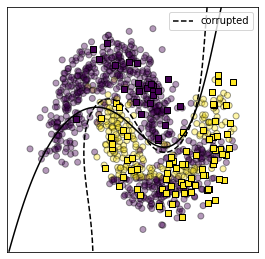

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


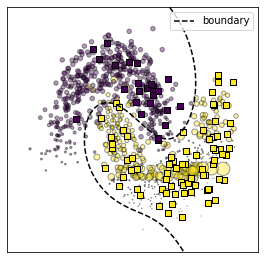

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


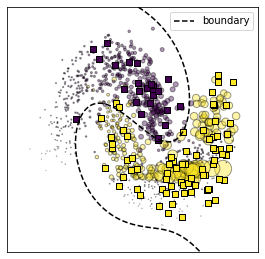

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


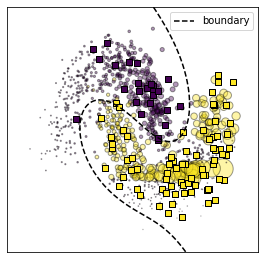

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/utils/metaestimators.py:121: FutureWarning: if_delegate_has_method was deprecated in version 1.1 and will be removed in version 1.3. Use available_if instead.
  warnings.warn(


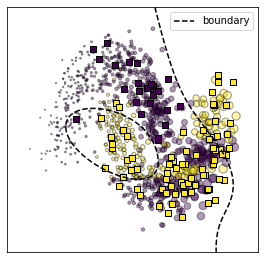

/home/topaxa/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/topaxa/.local/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


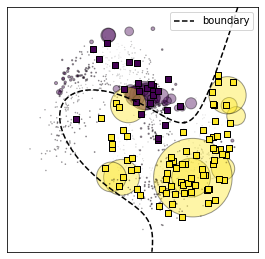

In [89]:
import os

import matplotlib.pyplot as plt
import numpy as np
from bqlearn.corruptions import (
    make_cluster_imbalance,
    make_instance_dependent_label_noise,
    make_label_noise,
    noisy_leaves_probability,
)
from bqlearn.corruptions.noise_matrices import flip_noise_matrix
from bqlearn.irbl import IRBL
from bqlearn.irlnl import IRLNL
from bqlearn.kdr import KKMM, KPDR
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.calibration import CalibratedClassifierCV, LabelEncoder
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from covariate import IRBL2, PDR

seed = 2

gb = CalibratedClassifierCV(GradientBoostingClassifier(), method="isotonic")
gb = MLPClassifier()
svm = SVC(kernel="poly", degree=3, coef0=1.0)

names = ["IRBL", "IRBL2", "KPDR", "PDR", "KKMM"]
classifiers = [
    IRBL(gb, svm),
    IRBL2(gb, gb, svm),
    KPDR(gb, svm, method="probabilities", n_jobs=-1),
    PDR(gb, svm, method="probabilities"),
    KKMM(
        svm,
        kernel="poly",
        kernel_params={"degree": 3, "coef0": 1.0},
        batch_size=None,
        n_jobs=-1,
    ),
]

n_samples = 1000
n_classes = 2

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=seed),
]

figure = plt.figure(figsize=(4.5 * (len(classifiers) + 1), 4.5 * len(datasets)))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    y = LabelEncoder().fit_transform(y)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    cm_dark = ListedColormap(["#FF8000", "#8000FF"])
    fig, ax = plt.subplots(figsize=(4.5, 4.5))

    Z = svm.fit(X[trusted], y[trusted]).decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    c2 = ax.contour(xx, yy, Z, levels=0, colors="black")
    h2, _ = c2.legend_elements()
    ax.legend([h2[0]], ["clean"])

    Z = svm.fit(X[untrusted], y[untrusted]).decision_function(
        np.c_[xx.ravel(), yy.ravel()]
    )
    Z = Z.reshape(xx.shape)

    c2 = ax.contour(xx, yy, Z, levels=0, linestyles="dashed", colors="black")
    h2, _ = c2.legend_elements()
    ax.legend([h2[0]], ["corrupted"])

    # trusted, untrusted = next(
    #     StratifiedShuffleSplit(train_size=0.05, random_state=seed).split(X, y)
    # )
    # sample_quality = np.ones_like(y)
    # sample_quality[untrusted] = 0

    # _, _, subsampled = make_cluster_imbalance(
    #     X,
    #     y,
    #     range(n_samples),
    #     per_class_n_clusters=4,
    #     majority_ratio=10,
    #     imbalance_distribution="linear",
    #     random_state=seed,
    # )

    # trusted = np.nonzero(X[:, 0] > 0)[0]
    # untrusted = np.nonzero(X[:, 0] <= 0)[0]
    # sample_quality = np.ones_like(y)
    # sample_quality[untrusted] = 0
    # subsampled = untrusted

    trusted = np.random.choice(
        np.arange(n_samples),
        size=int(n_samples / 10),
        replace=False,
        p=np.exp(X[:, 0]) / np.exp(X[:, 0]).sum(),
    )
    untrusted = np.arange(n_samples)[~np.isin(np.arange(n_samples),trusted)]
    sample_quality = np.ones_like(y)
    sample_quality[untrusted] = 0
    subsampled = untrusted

    y[untrusted] = make_instance_dependent_label_noise(
        noisy_leaves_probability(
            X,
            y,
            noise_ratio=0.3,
            purity="ascending",
            min_samples_leaf=40,
            random_state=seed,
        )[untrusted],
        y[untrusted],
        noise_matrix="permutation",
        random_state=seed,
    )

    selected = np.hstack([trusted, subsampled])

    # Plot the untrusted points
    ax.scatter(
        X[subsampled, 0],
        X[subsampled, 1],
        c=y[subsampled],
        edgecolors="k",
        alpha=0.4,
    )

    # Plot the trusted points
    ax.scatter(X[trusted, 0], X[trusted, 1], c=y[trusted], edgecolors="k", marker="s")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    # plt.savefig(
    #     os.path.join("two_moons", "total.pdf"),
    #     bbox_inches="tight",
    #     format="pdf",
    # )
    plt.show()
    plt.close()

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        fig, ax = plt.subplots(figsize=(4.5, 4.5))

        clf.fit(
            X[selected],
            y[selected],
            sample_quality=sample_quality[selected],
        )

        s = clf.sample_weight_

        s_corrupted = np.copy(s[len(trusted) :])
        # s_corrupted /= s_corrupted.sum()
        c_corrupted = np.copy(y[subsampled])

        # Plot the testing points
        ax.scatter(
            X[subsampled, 0],
            X[subsampled, 1],
            c=c_corrupted,
            s=20 * s_corrupted,
            edgecolors="k",
            alpha=0.4,
        )

        # Plot the training points
        ax.scatter(
            X[trusted, 0],
            X[trusted, 1],
            c=y[trusted],
            marker="s",
            edgecolors="k",
        )

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        c2 = ax.contour(xx, yy, Z, levels=0, linestyles="dashed", colors="black")
        h2, _ = c2.legend_elements()
        ax.legend([h2[0]], ["boundary"])

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        # plt.savefig(
        #     os.path.join("two_moons", name.replace(" ", "-").lower() + ".pdf"),
        #     bbox_inches="tight",
        #     format="pdf",
        # )
        plt.show()
        plt.close()


<Figure size 1944x324 with 0 Axes>

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1.         0.15853801]
 [0.15853801 1.        ]]


/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


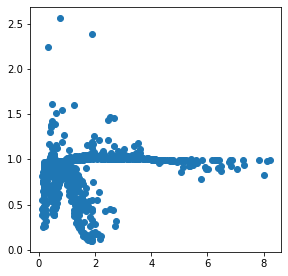

/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/topaxa/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1.         0.94498813]
 [0.94498813 1.        ]]


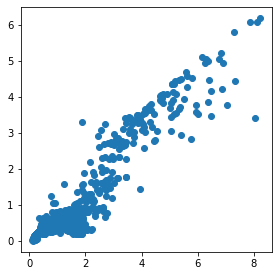

[[1.        0.9165621]
 [0.9165621 1.       ]]


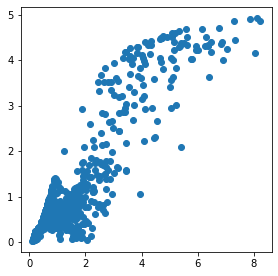

[[1.         0.96587591]
 [0.96587591 1.        ]]


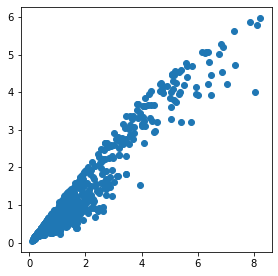

[[1.         0.58134609]
 [0.58134609 1.        ]]


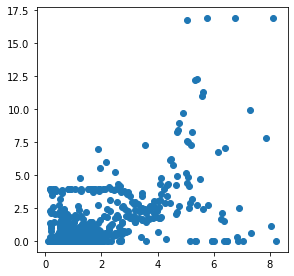

In [90]:
import os

import matplotlib.pyplot as plt
import numpy as np
from bqlearn.corruptions import (
    make_cluster_imbalance,
    make_instance_dependent_label_noise,
    make_label_noise,
    noisy_leaves_probability,
)
from bqlearn.corruptions.noise_matrices import flip_noise_matrix
from bqlearn.irbl import IRBL
from bqlearn.irlnl import IRLNL
from bqlearn.kdr import KKMM, KPDR
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.calibration import CalibratedClassifierCV, LabelEncoder
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from covariate import IRBL2, PDR

seed = 2

gb = MLPClassifier()
svm = SVC(kernel="poly", degree=3, coef0=1.0)

names = ["IRBL", "IRBL2", "KPDR", "PDR", "KKMM"]
classifiers = [
    IRBL(gb, svm),
    IRBL2(gb, gb, svm),
    KPDR(gb, svm, method="probabilities", n_jobs=-1),
    PDR(gb, svm, method="probabilities"),
    KKMM(
        svm,
        B=10,
        batch_size=None,
        n_jobs=-1,
    ),
]

n_samples = 1000
n_classes = 2

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=seed),
]

figure = plt.figure(figsize=(4.5 * (len(classifiers) + 1), 4.5 * len(datasets)))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    y = LabelEncoder().fit_transform(y)

    # trusted, untrusted = next(
    #     StratifiedShuffleSplit(train_size=0.05, random_state=seed).split(X, y)
    # )
    # sample_quality = np.ones_like(y)
    # sample_quality[untrusted] = 0

    # _, _, subsampled = make_cluster_imbalance(
    #     X,
    #     y,
    #     range(n_samples),
    #     per_class_n_clusters=4,
    #     majority_ratio=10,
    #     imbalance_distribution="linear",
    #     random_state=seed,
    # )

    # trusted = np.nonzero(X[:, 0] > 0)[0]
    # untrusted = np.nonzero(X[:, 0] <= 0)[0]
    # sample_quality = np.ones_like(y)
    # sample_quality[untrusted] = 0
    # subsampled = untrusted

    trusted = np.random.choice(
        np.arange(n_samples),
        size=int(n_samples / 10),
        replace=False,
        p=np.exp(X[:, 0]) / np.exp(X[:, 0]).sum(),
    )
    untrusted = np.arange(n_samples)[~np.isin(np.arange(n_samples), trusted)]
    sample_quality = np.ones_like(y)
    sample_quality[untrusted] = 0
    subsampled = untrusted

    # y[untrusted] = make_instance_dependent_label_noise(
    #     noisy_leaves_probability(
    #         X,
    #         y,
    #         noise_ratio=0.3,
    #         purity="ascending",
    #         min_samples_leaf=40,
    #         random_state=seed,
    #     )[untrusted],
    #     y[untrusted],
    #     noise_matrix="permutation",
    #     random_state=seed,
    # )

    selected = np.hstack([trusted, subsampled])

    plt.show()
    plt.close()

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        fig, ax = plt.subplots(figsize=(4.5, 4.5))

        clf.fit(
            X[selected],
            y[selected],
            sample_quality=sample_quality[selected],
        )

        s = clf.sample_weight_

        s_corrupted = np.copy(s[len(trusted) :])
        p_corrupted = np.exp(X[untrusted, 0])
        # s_corrupted /= s_corrupted.sum()

        plt.scatter(p_corrupted, s_corrupted)
        print(np.corrcoef(p_corrupted, s_corrupted))

        plt.show()
        plt.close()
